## 基础变换操作

1. **ToTensor**

将 PIL 图像或 NumPy 数组转换为 PyTorch 张量。
同时将像素值从 [0, 255] 归一化为 [0, 1]。


In [1]:

from torchvision import transforms
transform = transforms.ToTensor()


2. **Normalize**
对数据进行标准化，使其符合特定的均值和标准差。
通常用于图像数据，将像素值归一化为零均值和单位方差。


In [ ]:

transform = transforms.Normalize(mean=[0.5], std=[0.5])  # 归一化到 [-1, 1]




3. **Resize**
调整图像的大小。


In [ ]:

transform = transforms.Resize((128, 128))  # 将图像调整为 128x128



4. **CenterCrop**
从图像中心裁剪指定大小的区域。


In [ ]:

transform = transforms.CenterCrop(128)  # 裁剪 128x128 的区域


## 数据增强操作

1. **RandomCrop**
从图像中随机裁剪指定大小。
```python
transform = transforms.RandomCrop(128)
```

2. **RandomHorizontalFlip**
以一定概率水平翻转图像。
```python
transform = transforms.RandomHorizontalFlip(p=0.5)  # 50% 概率翻转
```

3. **RandomRotation**
随机旋转一定角度。
```python
transform = transforms.RandomRotation(degrees=30)  # 随机旋转 -30 到 +30 度
```

4. **ColorJitter**
随机改变图像的亮度、对比度、饱和度或色调。
```python
transform = transforms.ColorJitter(brightness=0.5, contrast=0.5)
```

## 实例：对图像数据集应用转换

In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 定义转换，这是一个组合转换, 将图像转换为 128x128 的大小，并归一化到 [-1, 1]
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# 加载数据集
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 创建 DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# 查看转换后的数据
for images, labels in train_loader:
    print('图片张量大小：',images.size())
    break

图片张量大小： torch.Size([32, 1, 128, 128])


----->可视化转换效果

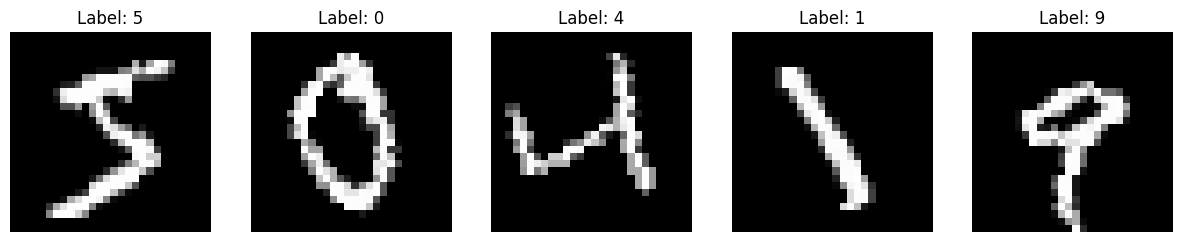

In [6]:
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision import datasets, transforms


# 原始和增强后的图像可视化
transform_augment = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.ToTensor()
])

# 加载数据集
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform_augment)

# 显示图像
def show_images(dataset):
    fig, axs = plt.subplots(1, 5, figsize=(15, 5))
    for i in range(5):
        image, label = dataset[i]
        axs[i].imshow(image.squeeze(0), cmap='gray')  # 将 (1, H, W) 转为 (H, W)
        axs[i].set_title(f"Label: {label}")
        axs[i].axis('off')
    plt.show()

show_images(dataset)

这是个测试模块

## 测试推送信息